## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [5]:
from sklearn.datasets import load_boston
data = load_boston()

In [10]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
i =data['data']

In [16]:
j = data['target']

In [17]:
j

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
import matplotlib.pyplot as plt

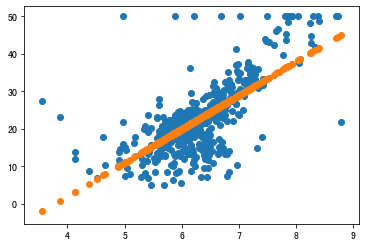

In [207]:
import random

k = random.randint(-100,100)
b = random.randint(-100,100)

def price_kb(k,b,r):
    
    return r*k + b
    
    
x = [ _*0.1 for _ in range(90)]
y = [price_kb(k,b,_)  for _ in x]

plt.scatter(i[:,5], j)
plt.scatter(i[:,5],[price_kb(9,-34,_)  for _ in i[:,5]])

In [198]:
def loss(y1,y0):
    
    return sum([(_1-_0)**2/len(y1) for _1,_0 in zip(y1,y0)])

In [199]:
loss([price_kb(k,b,_)  for _ in i[:,5]],j)

3483.9338228754946

In [215]:
min_loss = float('inf')

def calc_kb(ax,ay):
    
    number = 10000
    while(number > 0):
        k = random.randint(-100,100)*200 - 100
        b = random.randint(-100,100)*200 - 100
        
        loss_value = loss([price_kb(k,b,_)  for _ in i[:,5]],j)
        
        global min_loss
        
        if loss_value < min_loss:
            
            print("次数：{}，loss值：{}，k值：{}，b值：{}".format(10001 - number,loss_value,k,b))
            
            min_loss = loss_value
            
        number = number -1
        
calc_kb(i[:,5],j)

次数：1，loss值：5360106721.480501，k值：-10300，b值：-8100
次数：3，loss值：2324571007.7358313，k值：6700，b值：5900
次数：4，loss值：1429225159.3913226，k值：-4700，b值：-8100
次数：5，loss值：260919494.78484195，k值：-3100，b值：3500
次数：11，loss值：102849008.31164035，k值：-500，b值：13300
次数：19，loss值：6389373.312272734，k值：-700，b值：6900
次数：90，loss值：675864.9935375492，k值：900，b值：-5100
次数：839，loss值：509057.78405138326，k值：700，b值：-4900
次数：1015，loss值：395499.22278656164，k值：900，b值：-5700
次数：1218，loss值：248218.9985968379，k值：100，b值：-1100
次数：4062，loss值：28708.15084980238，k值：-100，b值：500


In [235]:
direction = [(+1, -1),(+1, +1), (-1, -1),(-1, +1)]

next_direction = random.choice(direction)

min_loss = float('inf')

k = random.random()*200 - 100
b = random.random()*200 - 100

scalar = 0.2

    
number = 2000

while(number > 0):

    k_direction,b_direction = next_direction

    loss_value = loss([price_kb(k + k_direction * scalar,b + b_direction * scalar , _ )  for _ in i[:,5]],j)

    if loss_value < min_loss:

        print("次数：{}，loss值：{}，k值：{}，b值：{}".format(2001 - number,loss_value,k + k_direction * scalar,b + b_direction * scalar ))

        min_loss = loss_value

        next_direction = next_direction
        
        k,b = k + k_direction * scalar,b + b_direction * scalar
    else :

        next_direction = random.choice(direction)

    number = number -1
        

次数：1，loss值：88384.89667639475，k值：43.77818764279546，b值：43.62725094167739
次数：2，loss值：87517.05069590459，k值：43.578187642795456，b值：43.427250941677386
次数：3，loss值：86653.48940288424，k值：43.37818764279545，b值：43.22725094167738
次数：4，loss值：85794.2127973337，k值：43.17818764279545，b值：43.02725094167738
次数：5，loss值：84939.22087925319，k值：42.97818764279545，b值：42.82725094167738
次数：6，loss值：84088.5136486425，k值：42.778187642795444，b值：42.627250941677374
次数：7，loss值：83242.09110550169，k值：42.57818764279544，b值：42.42725094167737
次数：8，loss值：82399.95324983065，k值：42.37818764279544，b值：42.22725094167737
次数：9，loss值：81562.10008162961，k值：42.178187642795436，b值：42.027250941677366
次数：10，loss值：80728.53160089847，k值：41.97818764279543，b值：41.82725094167736
次数：11，loss值：79899.24780763713，k值：41.77818764279543，b值：41.62725094167736
次数：12，loss值：79074.24870184562，k值：41.57818764279543，b值：41.42725094167736
次数：13，loss值：78253.53428352418，k值：41.378187642795424，b值：41.227250941677354
次数：14，loss值：77437.10455267256，k值：41.17818764279542，b值：41.0272509416

##采用梯度变化来控制方向(1)

目标loss=sum（(y_actual - y_target)**2），变量为k和b

y_actual模型：kx+b

目标是找到一组k，b，使得loss取得最小值。---->越来越小。


loss|k梯度：sum（2（y_actual-y_target）* x）

loos|b梯度：sum（2（y_atctual-y_target））

当梯度为症，且更大的时候，loss值变化越快，也更大。

为了使loss越来越小，k、b应该不断变化。k、b应该向梯度的反方向变化。

In [243]:
#梯度计算函数

def k_gradient(x,y_actual,y_target):
    
    return sum([2*(y_a - y_t)*x_  for x_,y_a,y_t in zip(x,y_actual,y_target)])/len(y_target)

def b_gradient(y_actual,y_target):
    
    return sum([2*(y_a - y_t)  for y_a,y_t in zip(y_actual,y_target)])/len(y_target)

In [271]:
min_loss = float('inf')

k = random.random()*200 - 100
b = random.random()*200 - 100

scaler = 0.0001
    
number = 1000

while(number > 0):

    loss_value = loss([price_kb(k,b,_) for _ in i[:,5]],j)

    if number %100 == 0:

        print("次数：{}，loss值：{}，k值：{}，b值：{}".format(1001 - number,loss_value,k,b))

        min_loss = loss_value
    
    k,b = k + (-1) * k_gradient(i[:,5],[k*x_+b for x_ in i[:,5]],j) *scaler,b + (-1) * b_gradient([k*x_+b for x_ in i[:,5]],j)*scaler

    number = number -1

次数：1，loss值：6290.114937675972，k值：-4.911089487778213，b值：-25.02322254953296
次数：101，loss值：1249.5665263290955，k值：1.929067523323508，b值：-23.950764529812336
次数：201，loss值：277.4989701412422，k值：4.933141937330307，b值：-23.481357456988068
次数：301，loss值：90.03565159480883，k值：6.252614975182134，b值：-23.27677757595644
次数：401，loss值：53.8828178827374，k值：6.832301563855361，b值：-23.188495190445323
次数：501，loss值：46.910126103163314，k值：7.087113642885518，b值：-23.151284040250633
次数：601，loss值：45.56480853764926，k值：7.199258237861798，b值：-23.136500257381744
次数：701，loss值：45.304727220866，k值：7.2487508822357505，b值：-23.131564994490923
次数：801，loss值：45.253933408889935，k值：7.270730098104859，b值：-23.13095429792764
次数：901，loss值：45.24350088054992，k值：7.280626835967987，b值：-23.132242344207906


##采用梯度变化来控制方向(2)

目标loss=sum（|y_actual - y_target|），变量为k和b

y_actual模型：kx+b

目标是找到一组k，b，使得loss取得最小值。---->越来越小。


loss|k梯度：sum（x）|y_actual > y_target + sum(-x)|y_actual<=y_target

loos|b梯度：sum（1）|y_actual > y_target + sum(-1)|y_actual<=y_target

当梯度为正，且更大的时候，loss值变化越快，也更大。

为了使loss越来越小，k、b应该不断变化。k、b应该向梯度的反方向变化。

In [299]:
#梯度计算函数及loss值计算

def k_gradient_abs(x,y_actual,y_target):
    
    sum_1 =sum_2 = 0
    
    for x_,y_a,y_t in zip(x,y_actual,y_target):
        
        if (y_a>y_t): sum_1 += x_
            
        if (y_a<=y_t): sum_2 += (-1) * x_
    
    return (sum_1 + sum_2)/len(y_target)

def b_gradient_abs(y_actual,y_target):
    
    sum_1 =sum_2 = 0
    
    for y_a,y_t in zip(y_actual,y_target):
        
        if (y_a>y_t): sum_1 += 1
            
        if (y_a<=y_t): sum_2 += (-1)
    
    return (sum_1 + sum_2)/len(y_target)

def loss_abs(y_actual,y_target):
    
    return sum([abs(y_a -y_b) for y_a,y_b in zip(y_actual,y_target)])/len(y_target)

In [309]:
min_loss = float('inf')

k = random.random()*200 - 100
b = random.random()*200 - 100

#k = 11
#b = -46
scaler = 0.0001
    
number = 10000

while(number > 0):

    loss_value = loss_abs([price_kb(k,b,_)  for _ in i[:,5]],j)

    if number %1000 == 0:

        print("次数：{}，loss值：{}，k值：{}，b值：{}".format(10001 - number,loss_value,k,b))

        min_loss = loss_value
    
    k,b = k + (-1) * k_gradient_abs(i[:,5],[k*x_+b for x_ in i[:,5]],j) *scaler,b + (-1) * b_gradient_abs([k*x_+b for x_ in i[:,5]],j)*scaler

    number = number -1

次数：1，loss值：26.633239397772734，k值：-4.394346604783152，b值：76.14383484669648
次数：1001，loss值：23.683711232078164，k值：-4.930231015059883，b值：76.05573603246727
次数：2001，loss值：20.852676140516863，k值：-5.455200102016419，b值：75.96914472811879
次数：3001，loss值：18.40847650493077，k值：-5.942616420593539，b值：75.88783247515453
次数：4001，loss值：16.442458671483358，k值：-6.37958423917056，b值：75.81351785064955
次数：5001，loss值：14.808372776835562，k值：-6.777699857747723，b值：75.74479690203346
次数：6001，loss值：13.481387580117707，k值：-7.136252994111225，b值：75.68191389808175
次数：7001，loss值：12.470965303892324，k值：-7.449006964071663，b值：75.6258470996629
次数：8001，loss值：11.637378443520442，k值：-7.733014424150643，b值：75.57410006408895
次数：9001，loss值：11.018284973820728，k值：-7.9768847364034805，b值：75.52842970835769


### Part 3: Finish the Solution Parse Part of Edit-Distance

In [398]:
from collections import defaultdict

solution = {}

candidates = []

distance_need = defaultdict(dict)

In [387]:
def lru_cache(maxsize):
    
    def decoartor(f):
    
        def wrap(string1,string2):

            if (string1,string2) in solution:

                return distance_need[(string1,string2)]

            result = f(string1,string2)

            distance_need[(string1,string2)] = result

            return result

        return wrap
    
    return decoartor

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    global candidates
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    #print(min_distance,"i_need:"+operation)
    solution[(string1, string2)] = operation 
    
    return min_distance

In [388]:
edit_distance('ABCDE', 'ABCCEF')

2

In [418]:
def parser_solution(string1,string2,solution):
    
    distance = edit_distance(string1,string2)
    
    def steps(string1,string2,solution):
    
        if (string1==string2):

             return ()

        if (len(string1) > len(string2)):

            return (solution[(string1,string2)],) + steps(string1[:-1],string2,solution)

        if len(string1) == len(string2):
            return (solution[(string1,string2)],) + steps(string1[:-1],string2[:-1],solution)

        if len(string1) < len(string2):
            return steps(string1,string2[:-1],solution) + (solution[(string1,string2)],)
        
    steps_list = [x for x in steps(string1,string2,solution) if x !='']
    
    return ('由右边往左编辑，总步数：{}'.format(str(distance)),steps_list) 
    

In [419]:
parser_solution('ABC', 'ABEFFGM',solution)

('由右边往左编辑，总步数：5', ['SUB C => E', 'ADD F', 'ADD F', 'ADD G', 'ADD M'])

In [420]:
parser_solution('EBCMCGC', 'ABGM',solution)

('由右边往左编辑，总步数：5', ['DEL C', 'DEL G', 'DEL C', 'SUB C => G', 'SUB E => A'])

In [423]:
parser_solution('c1297BCFM9','8899c',solution)

('由右边往左编辑，总步数：9',
 ['DEL 9',
  'DEL M',
  'DEL F',
  'DEL C',
  'DEL B',
  'SUB 7 => c',
  'SUB 2 => 9',
  'SUB 1 => 8',
  'SUB c => 8'])

In [430]:
del solution

In [431]:
#del solution
solution = {}
parser_solution('c1297BCFM9','8899cABDCEFMEDF',solution)

('由右边往左编辑，总步数：10',
 ['DEL 9',
  'DEL M',
  'DEL F',
  'DEL C',
  'SUB B => A',
  'SUB 7 => c',
  'SUB 2 => 9',
  'SUB 1 => 8',
  'SUB c => 8',
  'DEL 9',
  'DEL 9',
  'SUB 9 => E',
  'ADD D',
  'ADD F'])

In [402]:
solution

{('A', 'A'): '',
 ('A', 'A1'): 'ADD 1',
 ('A', 'A12'): 'ADD 2',
 ('A', 'A123'): 'ADD 3',
 ('A', 'A123B'): 'ADD B',
 ('A', 'A123BC'): 'ADD C',
 ('A', 'A123BCC'): 'ADD C',
 ('A', 'A123BCC4'): 'ADD 4',
 ('A', 'A123BCC49'): 'ADD 9',
 ('A', 'A123BCC49E'): 'ADD E',
 ('AB', 'A'): 'DEL B',
 ('AB', 'A1'): 'SUB B => 1',
 ('AB', 'A12'): 'ADD 2',
 ('AB', 'A123'): 'ADD 3',
 ('AB', 'A123B'): '',
 ('AB', 'A123BC'): 'ADD C',
 ('AB', 'A123BCC'): 'ADD C',
 ('AB', 'A123BCC4'): 'ADD 4',
 ('AB', 'A123BCC49'): 'ADD 9',
 ('AB', 'A123BCC49E'): 'ADD E',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'A1'): 'DEL C',
 ('ABC', 'A12'): 'SUB C => 2',
 ('ABC', 'A123'): 'ADD 3',
 ('ABC', 'A123B'): 'DEL C',
 ('ABC', 'A123BC'): '',
 ('ABC', 'A123BCC'): 'ADD C',
 ('ABC', 'A123BCC4'): 'ADD 4',
 ('ABC', 'A123BCC49'): 'ADD 9',
 ('ABC', 'A123BCC49E'): 'ADD E'}

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function?¶

Ans:导数/梯度的变化直接影响目标函数值的变化，方向确定，更有利于快速找到目标。

2. In the words 'Gradient Descent', what's the Gredient and what's the Descent?¶

Ans:Gradient是目标函数的导数，Descent是目标参数沿着导数反方向的变化，-1*Gradient


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:方向确定，可控变化率/学习率

4. Using the simple words to describe: What's the machine leanring.¶

Ans:对已有数据进行建模（设定模拟函数），通过数据不断优化模型函数，

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

In [ ]:
在搜索中存在大量的重复计算工作，通过动态规划可以避免重复计算。区别在于动态规划会把已经计算过的数据存起来，而search没有，每次都重新计算。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

搜索场景中涉及到的重复计算是随着搜索层数的递增，指数级上升，非常消耗cpu，耗费时间。动态规划能都大幅度梯度程序处理效率。机器学习建立的模型适用于特定场景，不是万能的，动态规划的思想则适应性更强。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

扫地机器人新建地图扫图、网页索引、外卖骑手路线规划

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
语言识别纠错

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

1、分析子问题的重复性；
2、子问题进行存储；
3、Solution解析。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

The main limitation to this type of coding is keeping track of previous decisions and partial choices that may be applied to a future answer.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

part_6 Finished.

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

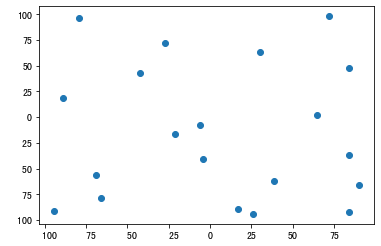

In [4]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

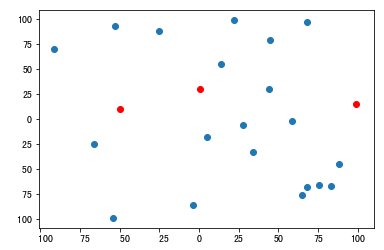

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro